# Table of Contents
<p>
<div class="lev1 toc-item">
    <a href="#Cargamos-la-serie" data-toc-modified-id="Cargamos-la-serie">
        <span class="toc-item-num">1&nbsp;&nbsp;</span>
        Cargamos la serie</a></div>
    
<div class="lev1 toc-item">
    <a href="#Distribución-de-transacciones-en-horario-de-funcionamiento-de-los-parquímetros" data-toc-modified-id="Distribución-de-transacciones-en-horario-de-funcionamiento-de-los-parquímetros">
    <span class="toc-item-num">2&nbsp;&nbsp;</span>
    Distribución de transacciones en horario de funcionamiento de los parquímetros</a></div>
    
<div class="lev1 toc-item">
    <a href="#Distribución-de-ocupación-en-horario-de-funcionamiento-de-los-parquímetros" data-toc-modified-id="Distribución-de-ocupación-en-horario-de-funcionamiento-de-los-parquímetros">
    <span class="toc-item-num">3&nbsp;&nbsp;</span>
    Distribución de ocupación en horario de funcionamiento de los parquímetros</a></div>

<div class="lev1 toc-item">
    <a href="#Distribución-de-transacciones-por-parquímetro" data-toc-modified-id="Distribución-de-transacciones-por-parquímetro">
    <span class="toc-item-num">4&nbsp;&nbsp;</span>
    Distribución de transacciones por parquímetro</a></div>
    
<div class="lev1 toc-item">
    <a href="#Distribución-de-ocupación-por-parquímetro" data-toc-modified-id="Distribución-de-ocupación-por-parquímetro">
    <span class="toc-item-num">5&nbsp;&nbsp;</span>
    Distribución de ocupación por parquímetro</a></div>
    
<div class="lev1 toc-item">
    <a href="#Frecuencia-media-de-actualización-de-ocupación" data-toc-modified-id="Frecuencia-media-de-actualización-de-ocupación">
    <span class="toc-item-num">6&nbsp;&nbsp;</span>
    Frecuencia media de actualización de ocupación</a></div>    

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import folium
from folium.plugins import MarkerCluster, HeatMapWithTime
%matplotlib inline

## Cargamos la serie

In [16]:
df = pd.read_csv(os.path.join('./data/Serie_Total2016.csv'))

In [17]:
df.head()

,element_key,latitude,longitude,timestamp,occupation_perc,prcp,tmax,tmin
0,76198,47.620282,-122.340968,2016-01-02 08:00:00,4.76,0.0,42,25
1,1009,47.605010,-122.336669,2016-01-02 08:00:00,15.38,0.0,42,25
2,31494,47.610336,-122.346666,2016-01-02 08:00:00,11.76,0.0,42,25
3,4442,47.617992,-122.350157,2016-01-02 08:00:00,6.25,0.0,42,25
4,76721,47.626936,-122.329971,2016-01-02 08:00:00,4.76,0.0,42,25


In [18]:
df.tail()

,element_key,latitude,longitude,timestamp,occupation_perc,prcp,tmax,tmin
3613755,74033,47.616351,-122.345806,2016-12-31 20:00:00,0.0,0.03,38,29
3613756,72330,47.617442,-122.349221,2016-12-31 20:00:00,0.0,0.03,38,29
3613757,2786,47.616851,-122.350210,2016-12-31 20:00:00,0.0,0.03,38,29
3613758,58493,47.607079,-122.337774,2016-12-31 20:00:00,0.0,0.03,38,29
3613759,69278,47.612578,-122.317988,2016-12-31 20:00:00,0.0,0.03,38,29


In [19]:
df.timestamp = pd.to_datetime(df.timestamp)

In [20]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3613760 entries, 0 to 3613759
Data columns (total 8 columns):
element_key        int64
latitude           float64
longitude          float64
timestamp          datetime64[ns]
occupation_perc    float64
prcp               float64
tmax               int64
tmin               int64
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 220.6 MB


In [99]:
# Eliminamos los valores de ocupación 0 correspondientes a las 20 horas
df = df.loc[df.timestamp.dt.hour < 20]

## Distribución de transacciones en horario de funcionamiento de los parquímetros

In [100]:
day_hours_count = df.timestamp.dt.hour.value_counts(normalize=True).mul(100).map(lambda x: np.round(x, 4)).sort_index()
day_hours_count
# función value_counts con normalize=True devuelve las frecuencias relativas de cada valor único

8     7.3623
9     8.1121
10    8.7022
11    9.0272
12    9.2233
13    9.2063
14    9.1562
15    8.7592
16    8.3270
17    8.4024
18    7.2925
19    6.4293
Name: timestamp, dtype: float64

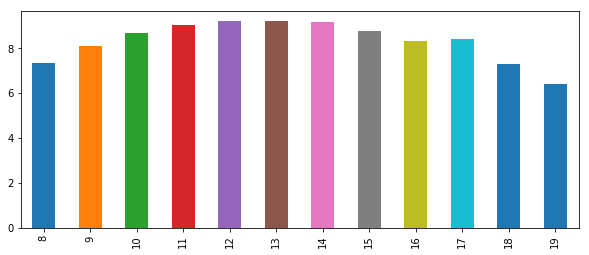

In [101]:
day_hours_count.plot(kind='bar', figsize=(10, 4));

Vemos como más del 50% de los tickets están entre las 10:00h y las 15:59h

In [102]:
day_hours_count.sort_values(ascending=False).cumsum()

12      9.2233
13     18.4296
14     27.5858
11     36.6130
15     45.3722
10     54.0744
17     62.4768
16     70.8038
9      78.9159
8      86.2782
18     93.5707
19    100.0000
Name: timestamp, dtype: float64

## Distribución de ocupación en horario de funcionamiento de los parquímetros

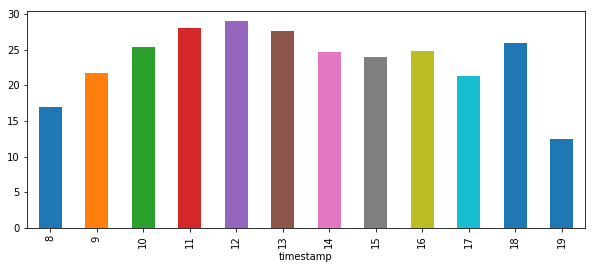

In [103]:
perc_occupation_by_hour = df.groupby(df.timestamp.dt.hour).occupation_perc.mean()
perc_occupation_by_hour.plot(kind='bar',figsize=(10, 4));

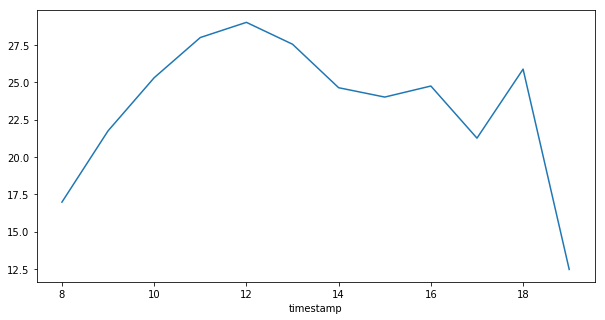

In [104]:
df.groupby(df.timestamp.dt.hour).occupation_perc.mean().plot(figsize=(10,5))

### Ocupación media por día de la semana

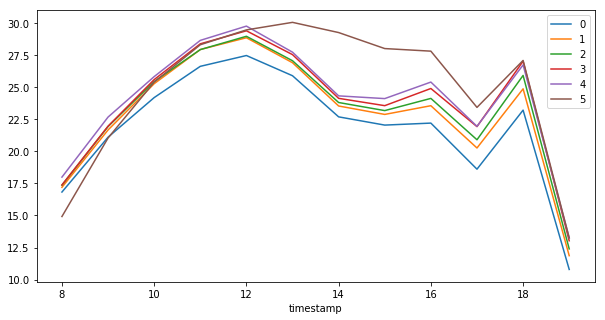

In [105]:
for i in range(6):
    df.loc[df.timestamp.dt.weekday == i].groupby(
        df.timestamp.dt.hour).occupation_perc.mean().plot(label= i, figsize=(10, 5)).legend()

### Ocupación media por mes

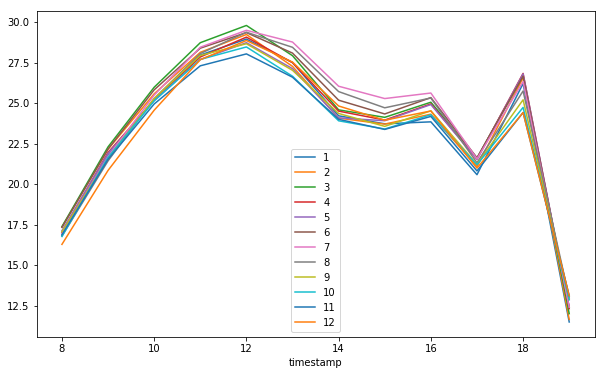

In [106]:
for i in range(1,13):
    df.loc[df.timestamp.dt.month == i].groupby(
        df.timestamp.dt.hour).occupation_perc.mean().plot(label= i, figsize=(10, 6)).legend()

### Ocupación media por día del mes

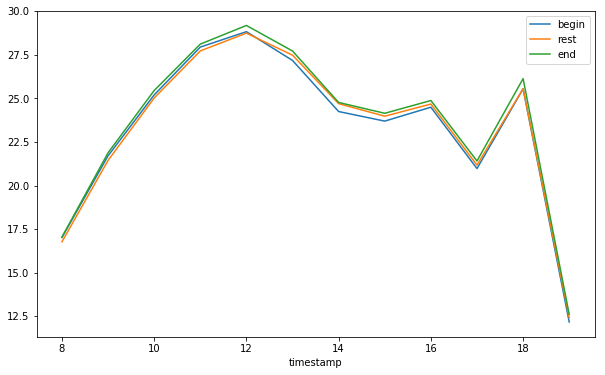

In [107]:
begin_month = [1,2,3,4,5,6,7]
end_month = [25,26,27,28,29,30,31]
rest_month = range(8,25)
df.loc[df.timestamp.dt.day.isin(begin_month)].groupby(df.timestamp.dt.hour).occupation_perc.mean().plot(
    label= "begin", figsize=(10, 6)).legend()
df.loc[df.timestamp.dt.day.isin(end_month)].groupby(df.timestamp.dt.hour).occupation_perc.mean().plot(
    label= "rest", figsize=(10, 6)).legend()
df.loc[df.timestamp.dt.day.isin(rest_month)].groupby(df.timestamp.dt.hour).occupation_perc.mean().plot(
    label= "end", figsize=(10, 6)).legend()

## Distribución de transacciones por parquímetro

In [38]:
df.element_key.unique().size

1192

Días de operación de los parquímetros:

In [40]:
time_elapsed_days = df.timestamp.dt.dayofyear.unique().size
print(time_elapsed_days)

304


Tickets al día por parquímetro:

In [42]:
parkimeter_ticket_by_day = df.groupby('element_key').prcp.count() / time_elapsed_days
parkimeter_ticket_by_day.sort_values(ascending=False, inplace=True)
parkimeter_ticket_by_day.name = 'tickets_by_day'
parkimeter_ticket_by_day.head()

element_key
69446    12.970395
12290    12.940789
69489    12.940789
35845    12.934211
12289    12.927632
Name: tickets_by_day, dtype: float64

In [43]:
parkimeter_ticket_by_day.tail()

element_key
12538    0.250000
34501    0.118421
10053    0.059211
35730    0.023026
10054    0.009868
Name: tickets_by_day, dtype: float64

In [44]:
parkimeter_ticket_by_day.quantile(np.linspace(0, 1, 21))

0.00     0.009868
0.05     5.081414
0.10     6.412171
0.15     7.386678
0.20     8.064474
0.25     8.633224
0.30     9.120395
0.35     9.499507
0.40     9.838158
0.45    10.187336
0.50    10.519737
0.55    10.871875
0.60    11.196053
0.65    11.553125
0.70    11.811513
0.75    12.021382
0.80    12.243421
0.85    12.438651
0.90    12.634868
0.95    12.779605
1.00    12.970395
Name: tickets_by_day, dtype: float64

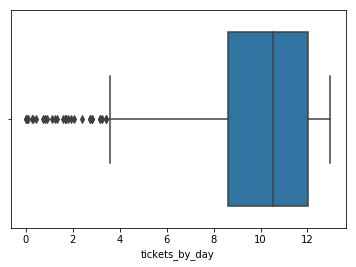

In [45]:
sns.boxplot(parkimeter_ticket_by_day);

## Distribución de ocupación por parquímetro

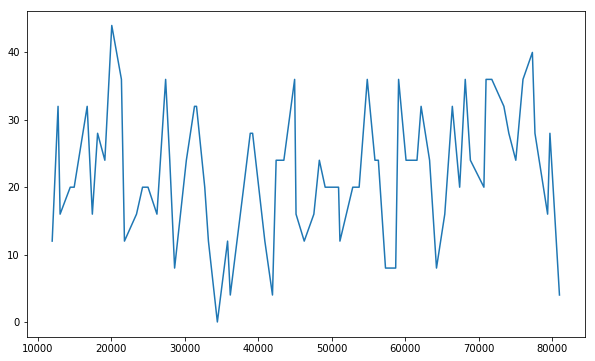

In [108]:
df.loc[(df.element_key == 69446) & (df.timestamp.dt.week == 1)].occupation_perc.plot(figsize=(10, 6));

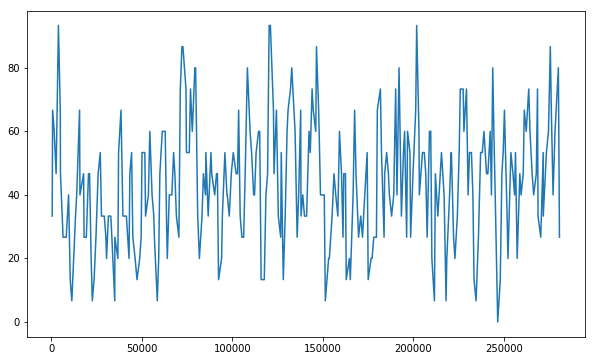

In [109]:
df.loc[(df.element_key == 12289) & (df.timestamp.dt.month == 1)].occupation_perc.plot(figsize=(10, 6));

In [111]:
ocupation_stats = df.groupby('element_key').occupation_perc.describe().sort_values(by='mean', ascending=False)
ocupation_stats.head(10)

,count,mean,std,min,25%,50%,75%,max
element_key,,,,,,,,
70762,3292.0,63.031592,25.240832,0.0,50.00,70.00,80.00,95.00
54002,2388.0,60.273492,24.879094,0.0,40.00,66.67,80.00,93.33
31889,3180.0,59.526654,27.666503,0.0,41.18,70.59,82.35,94.12
56682,3414.0,58.318784,19.223598,0.0,41.67,58.33,75.00,91.67
8626,2680.0,57.552056,27.073863,0.0,46.15,61.54,76.92,92.31
69089,3552.0,56.433246,24.518394,0.0,42.11,63.16,73.68,94.74
76617,2320.0,55.760453,26.969392,0.0,35.71,64.29,78.57,92.86
32125,2843.0,55.410995,29.159034,0.0,41.67,62.50,79.17,95.83
37186,3408.0,53.937714,21.952228,0.0,36.36,54.55,72.73,90.91


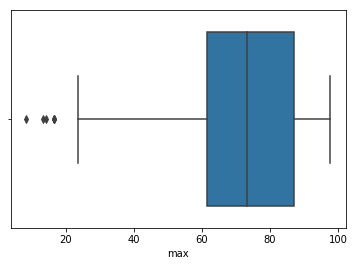

In [112]:
sns.boxplot(ocupation_stats['max'])

In [113]:
ocupation_stats['max'].quantile(np.linspace(0, 1, 21))

0.00     8.330
0.05    43.750
0.10    50.000
0.15    54.550
0.20    58.330
0.25    61.540
0.30    63.640
0.35    66.670
0.40    68.276
0.45    70.590
0.50    73.205
0.55    76.470
0.60    78.570
0.65    81.250
0.70    83.330
0.75    86.960
0.80    90.000
0.85    91.670
0.90    92.860
0.95    94.120
1.00    97.730
Name: max, dtype: float64

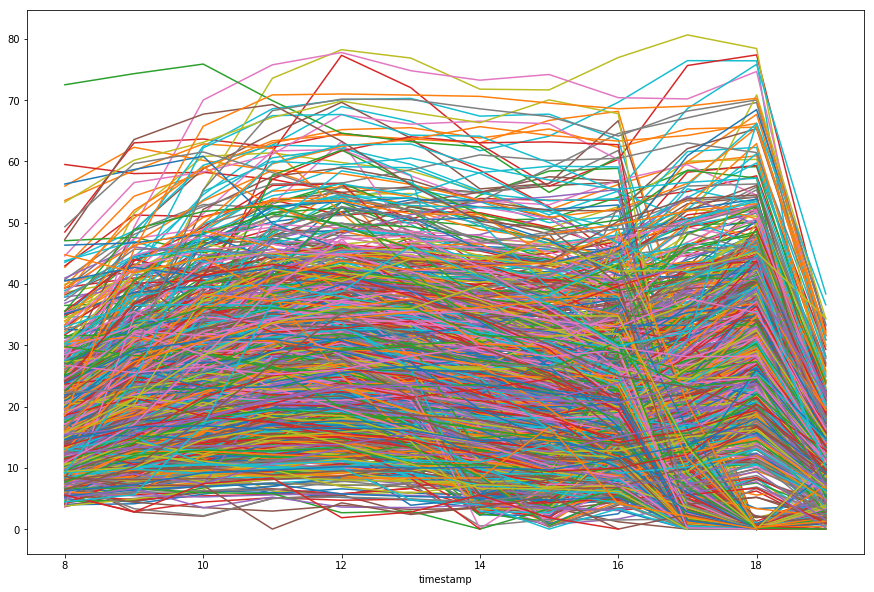

In [114]:
# Representación de la media de ocupación por hora de todos los parquímetros
eks = list(df.element_key.unique())
for ek in eks:
    df.loc[df.element_key == ek].groupby(df.timestamp.dt.hour).occupation_perc.mean().plot(figsize=(15,10))

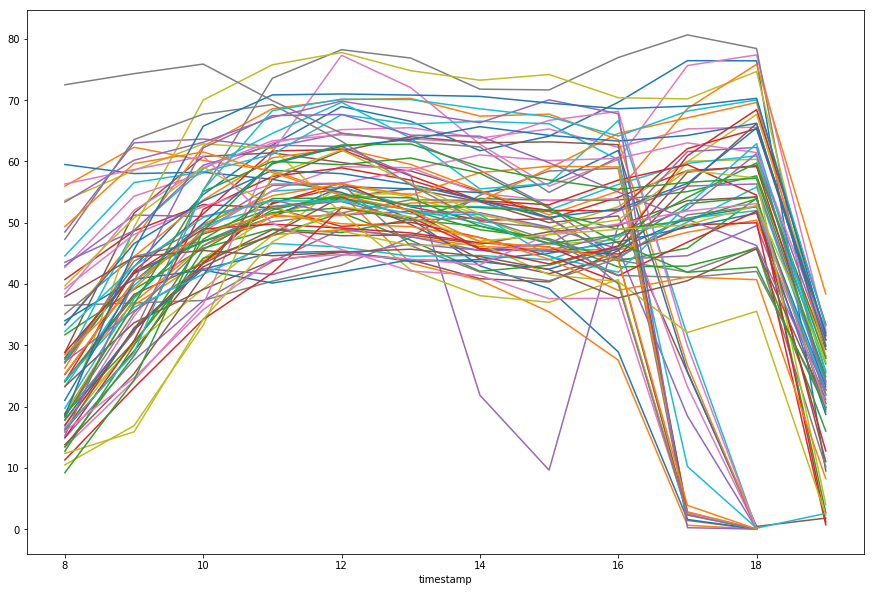

In [115]:
# Representación de la media de ocupación por hora de los parquímetros con mayor % de ocupación media
eks = list(df.element_key.unique())
for ek in eks:
    if df.occupation_perc.loc[df.element_key == ek].mean() > 40:
        df.loc[df.element_key == ek].groupby(df.timestamp.dt.hour).occupation_perc.mean().plot(figsize=(15,10))

## Frecuencia media de actualización de ocupación

La calculamos en minutos

In [116]:
update_frequency = df.groupby('element_key').timestamp.agg(lambda series: series.diff().mean().seconds / 60.0)

In [117]:
update_frequency.head()

element_key
1001    298.583333
1002    271.033333
1005    262.183333
1006    219.766667
1009    272.066667
Name: timestamp, dtype: float64

In [118]:
update_frequency.quantile(np.linspace(0, 1, 21))

0.00      30.000000
0.05     145.835000
0.10     147.070000
0.15     148.594167
0.20     150.306667
0.25     152.991667
0.30     155.811667
0.35     158.228333
0.40     161.333333
0.45     164.765833
0.50     169.158333
0.55     173.216667
0.60     178.633333
0.65     184.969167
0.70     191.466667
0.75     203.220833
0.80     214.976667
0.85     230.910000
0.90     258.318333
0.95     314.277500
1.00    1095.633333
Name: timestamp, dtype: float64

Hay series que tienen frecuencias realmente bajas

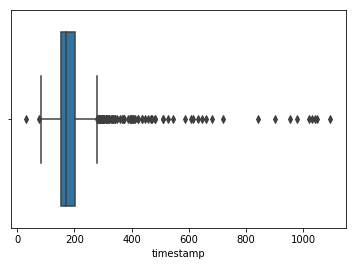

In [119]:
sns.boxplot(update_frequency);

Repetimos el análisis para los 100 parquímetros con mayor número de transacciones:

In [140]:
top100_list = df.groupby('element_key').prcp.count().sort_values(ascending=False).head(100).index.get_values()
df_top100 = df.loc[df.element_key.isin(top100_list)]
uf = df_top100.groupby('element_key').timestamp.agg(lambda series: series.diff().mean().seconds / 60.0)
uf.quantile(np.linspace(0, 1, 21))

0.00    144.050000
0.05    144.565000
0.10    144.650000
0.15    144.809167
0.20    144.963333
0.25    145.112500
0.30    145.201667
0.35    145.333333
0.40    145.470000
0.45    145.559167
0.50    145.616667
0.55    145.790833
0.60    145.913333
0.65    146.072500
0.70    146.166667
0.75    146.254167
0.80    146.350000
0.85    146.466667
0.90    146.503333
0.95    146.633333
1.00    146.833333
Name: timestamp, dtype: float64

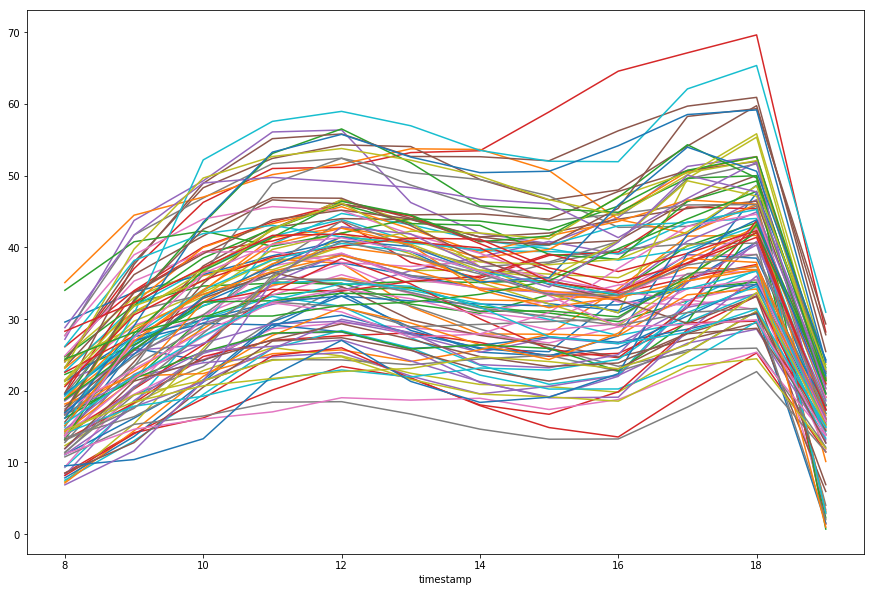

In [143]:
# Representación de la media de ocupación por hora de los 100 parquímetros con más transacciones
for ek in top100_list:
    df.loc[df.element_key == ek].groupby(df.timestamp.dt.hour).occupation_perc.mean().plot(figsize=(15,10))